<a href="https://colab.research.google.com/github/wjdavenport/FDC-Project-Backup/blob/main/jobAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn joblib pandas matplotlib

In [4]:
import os
print(os.getcwd())

/content


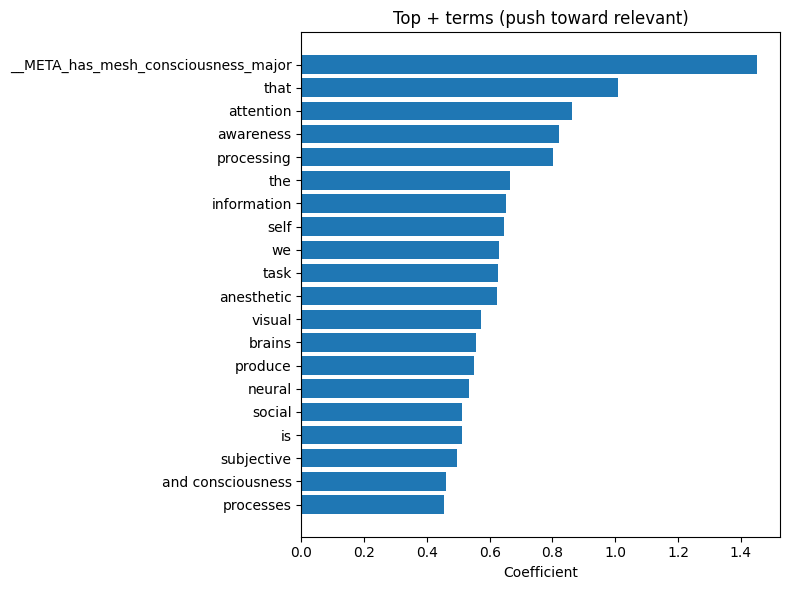

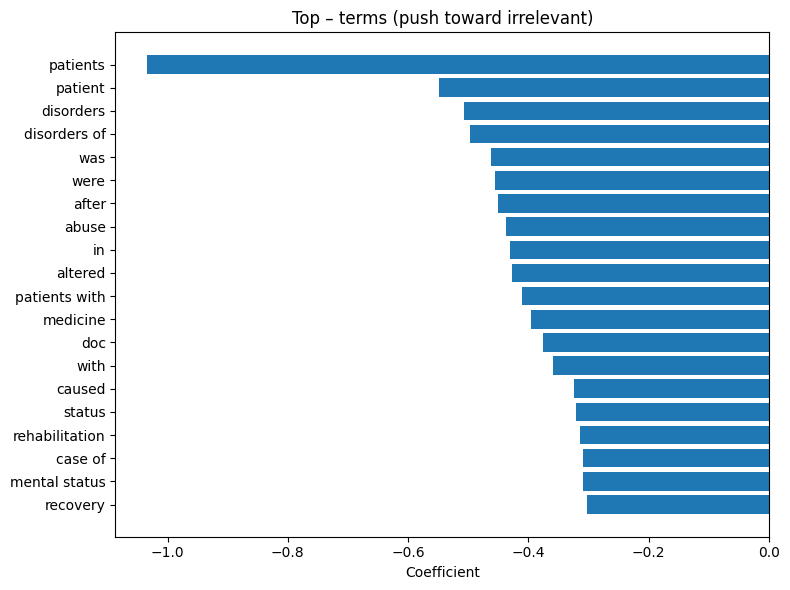


Meta feature weights:
                               feature    weight
0  __META_has_mesh_consciousness_major  1.452454
1        __META_has_mesh_consciousness  0.377410
2      __META_has_mesh_spirit_religion  0.000000
3                        __META_n_mesh -0.086343


In [7]:
import joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt

# Load artifacts
tfidf = joblib.load("../tfidf.joblib")
lr    = joblib.load("../lr_tfidf_meta.joblib")

# Build full feature name list (TF-IDF + meta), matching training time
tf_names = np.array(tfidf.get_feature_names_out())
meta_names = np.array([
    "__META_has_mesh_consciousness_major",
    "__META_has_mesh_consciousness",
    "__META_has_mesh_spirit_religion",
    "__META_n_mesh",
])
features = np.concatenate([tf_names, meta_names])

coef = lr.coef_.ravel()
assert coef.size == features.size, f"Mismatch: {coef.size} weights vs {features.size} features"

# Choose k safely
top_k = min(20, coef.size)

# Indices for top positive/negative weights
ix_pos = np.argsort(coef)[-top_k:][::-1]
ix_neg = np.argsort(coef)[:top_k]

df_pos = pd.DataFrame({"feature": features[ix_pos], "weight": coef[ix_pos]})
df_neg = pd.DataFrame({"feature": features[ix_neg], "weight": coef[ix_neg]})

# Simple barh plot utility
def barplot(df, title):
    plt.figure(figsize=(8, 6))
    # plot from smallest to largest so bars read top-to-bottom
    plt.barh(df["feature"][::-1], df["weight"][::-1])
    plt.title(title)
    plt.xlabel("Coefficient")
    plt.tight_layout()
    plt.show()

barplot(df_pos, "Top + terms (push toward relevant)")
barplot(df_neg, "Top – terms (push toward irrelevant)")

# (Optional) show the 4 meta weights explicitly
meta_mask = np.isin(features, meta_names)
print("\nMeta feature weights:")
print(pd.DataFrame({"feature": features[meta_mask], "weight": coef[meta_mask]}))
